# Evaluacion de modelos 


In [1]:
# Compare Algorithms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [3]:

dataframe = pd.read_csv('csv_precio_div.csv')
features=['Rooms','Distance','Bathroom','Landsize','Lattitude','Longtitude']
X = dataframe[features]
y = dataframe['precio_div']


/home/inma/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Balanced Data Set')

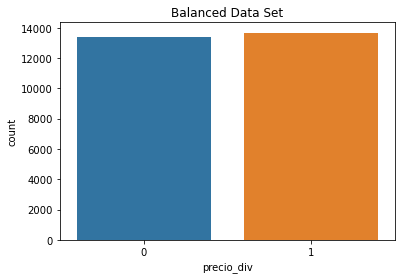

In [4]:
# Visualize the classes distributions
sns.countplot(x=dataframe["precio_div"]).set_title("Outcome Count")
# Comprobar que los datos estan balanceados
sns.countplot(y).set_title('Balanced Data Set')


In [5]:
# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = SVC(C=50,gamma=1,kernel='rbf')
dtr_model = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       min_samples_split=5)
rfc_model = RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=5)
KNN_model = KNeighborsClassifier(n_neighbors=7)
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}
# Define the models evaluation function
def models_evaluation(X, y, folds):

SyntaxError: unexpected EOF while parsing (<ipython-input-5-fac0c450621d>, line 14)

In [ ]:
  # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    knn = cross_validate(KNN_model, X, y, cv=folds, scoring=scoring)

In [ ]:
  # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[knn['test_accuracy'].mean(),
                                                              knn['test_precision'].mean(),
                                                              knn['test_recall'].mean(),
                                                              knn['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
 # Add 'Best Score' column
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
# Return models performance metrics scores data frame
return(models_scores_table)

# Run models_evaluation function
best_models_sccore=models_evaluation(X, y, 5) 


In [ ]:
seed = 7

#para poder visualizarlos
log_model = LogisticRegression(max_iter=10000)
svc_model = SVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
KNN_model = KNeighborsClassifier()

models = []
models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('RFC', RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       min_samples_split=5)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=7)))
models.append(('DTC', DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       min_samples_split=5)))
models.append(('SVM', SVC(C=50,gamma=1,kernel='rbf')))



results = []
names = []
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}
for score in scoring:
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=score)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()